In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Rectangle


In [2]:
seen_df = pd.read_csv('../data/0_labelled_documents.csv')
relevance = pd.read_csv('../data/1_document_relevance.csv')
print(relevance.shape)
print(seen_df.shape)

relevance.head()

(398971, 5)
(2223, 242)


,id,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred
0,740010,0.009046,0.001371,0.007675,0.010417
1,3300415,0.055892,0.013545,0.042347,0.069436
2,3821128,0.269951,0.026715,0.243236,0.296665
3,711341,0.465122,0.068707,0.396415,0.533828
4,1474274,0.509145,0.117428,0.391717,0.626573


In [3]:
ar5 = pd.read_csv('../literature_identification/IPCC_extraction.csv')
print(ar5.shape)
ar5.head()

(351, 6)


,Unnamed: 0,au,py,doc,system,region
0,0,Mölg,2008,1389000.0,"Mountains, snow and ice",Africa
1,1,Taylor,2009,NaN,"Mountains, snow and ice",Africa
2,2,Mölg,2012,NaN,"Mountains, snow and ice",Africa
3,3,Bauder,2007,2090029.0,"Mountains, snow and ice",Europe
4,4,Björnsson and Pálsson,2008,718151.0,"Mountains, snow and ice",Europe


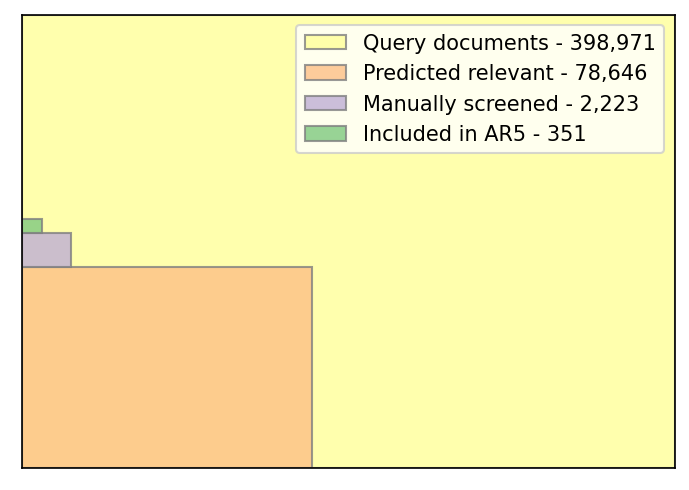

In [4]:
def factorise_square(n, col, label, bottom=0):
    x = np.sqrt(n)*1.2
    y = n/x
    rect = Rectangle(
        (0, bottom),x,y,
        facecolor=col,
        edgecolor="grey",
        label=f"{label} - {n:,}",
        alpha=0.8
    )
    return x,y+bottom, rect

fig, ax = plt.subplots(dpi=150)

cols = ['#7fc97f','#beaed4','#fdc086','#ffff99']
cols.reverse()

x,y,rect = factorise_square(relevance.shape[0], cols[0], "Query documents")
ax.add_patch(rect)

ax.set_xlim(xmax=x)
ax.set_ylim(ymax=y)

rel = relevance[relevance['0 - relevance - mean_prediction']>0.5].shape[0]

x,y,rect = factorise_square(rel, cols[1], "Predicted relevant")
ax.add_patch(rect)

x,y,rect = factorise_square(seen_df.shape[0], cols[2], "Manually screened", bottom=y)
ax.add_patch(rect)

x,y,rect = factorise_square(ar5.shape[0], cols[3], "Included in AR5", bottom=y)
ax.add_patch(rect)

ax.set_xticks([])
ax.set_yticks([])

ax.legend()



ax.set_aspect('equal')

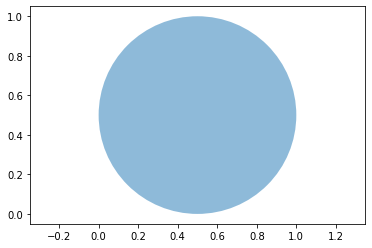

In [5]:
from matplotlib.patches import Circle
fig, ax = plt.subplots()



circle = Circle(
    (0.5,0.5),0.5,
    alpha=0.5
)
ax.add_patch(circle)

ax.axis('equal')


plt.show()

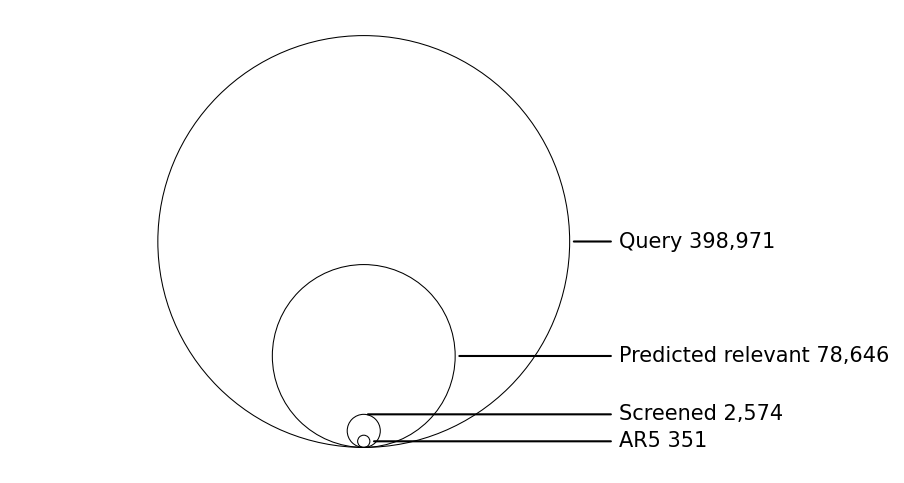

In [6]:
from matplotlib.patches import Circle
import math

fig, ax = plt.subplots(dpi=150)
max_area = relevance.shape[0]

cols=["black","black","black","black"]

lw = .5

#Query docs
max_r = math.sqrt(relevance.shape[0]/max_area/math.pi)
circle = Circle(
    (0.5,0.5), max_r,
    color="None",
    ec=cols[0],
    lw=lw
)
ax.add_patch(circle)
ax.annotate(f"Query {relevance.shape[0]:,}", (0.5+max_r,0.5), (1.2,0.5), arrowprops={"arrowstyle": "-"}, va="center")

# Included
r = math.sqrt(rel/max_area/math.pi)
circle = Circle(
    (0.5,0.5-(max_r-r)),r,
    color="None",
    ec=cols[1],
    lw=lw
)
ax.add_patch(circle)
ax.annotate(f"Predicted relevant {rel:,}", (0.5+r,0.5-(max_r-r)), (1.2,0.5-(max_r-r)), arrowprops={"arrowstyle": "-"}, va="center")

# Screened
n = seen_df.shape[0]+ar5.shape[0]
r = math.sqrt((n)/max_area/math.pi)
circle = Circle(
    (0.5,0.5-(max_r-r)),r,
    color="None",
    ec=cols[2],
    lw=lw
)
ax.add_patch(circle)
ax.annotate(f"Screened {n:,}", (0.5,0.5-(max_r-r)+r), (1.2,0.5-(max_r-r)+r), arrowprops={"arrowstyle": "-"}, va="center")

# Screened
r = math.sqrt((+ar5.shape[0])/max_area/math.pi)
circle = Circle(
    (0.5,0.5-(max_r-r)),r,
    color="None",
    ec=cols[3],
    lw=lw
)
ax.add_patch(circle)
ax.annotate(f"AR5 {ar5.shape[0]:,}", (0.5+r,0.5-(max_r-r)), (1.2,0.5-(max_r-r)), arrowprops={"arrowstyle": "-"}, va="center")



ax.axis('equal')
ax.axis('off')



plt.show()

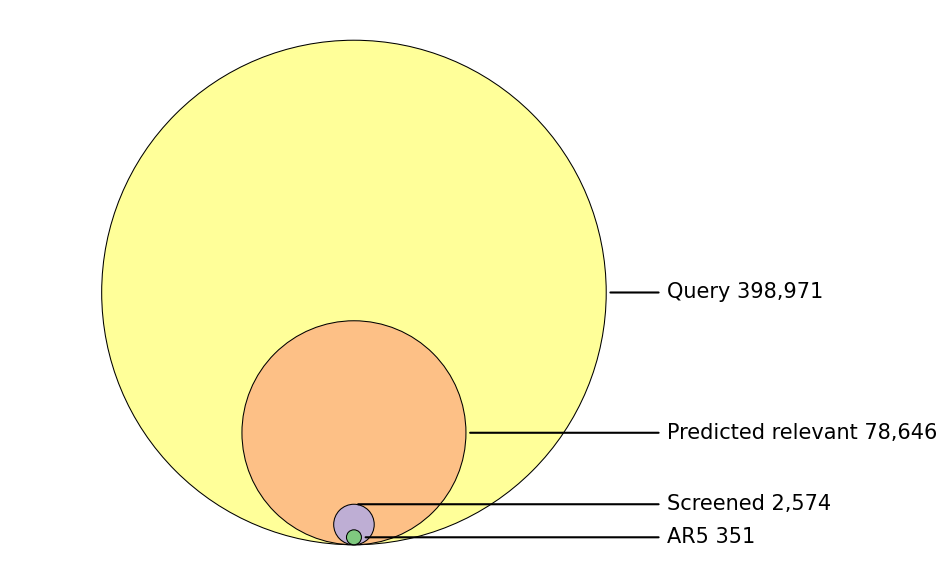

In [7]:
from matplotlib.patches import Circle
import math

fig, ax = plt.subplots(dpi=150)
max_area = relevance.shape[0]

cols=["black","black","black","black"]
fill_cols = ['#7fc97f','#beaed4','#fdc086','#ffff99']
fill_cols.reverse()
lw = .5

#Query docs
max_r = math.sqrt(relevance.shape[0]/max_area/math.pi)
circle = Circle(
    (0.5,0.5), max_r,
    color=fill_cols[0],
    ec=cols[0],
    lw=lw
)
ax.add_patch(circle)
ax.annotate(f"Query {relevance.shape[0]:,}", (0.5+max_r,0.5), (1.2,0.5), arrowprops={"arrowstyle": "-"}, va="center")

# Included
r = math.sqrt(rel/max_area/math.pi)
circle = Circle(
    (0.5,0.5-(max_r-r)),r,
    color=fill_cols[1],
    ec=cols[1],
    lw=lw
)
ax.add_patch(circle)
ax.annotate(f"Predicted relevant {rel:,}", (0.5+r,0.5-(max_r-r)), (1.2,0.5-(max_r-r)), arrowprops={"arrowstyle": "-"}, va="center")

# Screened
n = seen_df.shape[0]+ar5.shape[0]
r = math.sqrt((n)/max_area/math.pi)
circle = Circle(
    (0.5,0.5-(max_r-r)),r,
    color=fill_cols[2],
    ec=cols[2],
    lw=lw
)
ax.add_patch(circle)
ax.annotate(f"Screened {n:,}", (0.5,0.5-(max_r-r)+r), (1.2,0.5-(max_r-r)+r), arrowprops={"arrowstyle": "-"}, va="center")

# Screened
r = math.sqrt((+ar5.shape[0])/max_area/math.pi)
circle = Circle(
    (0.5,0.5-(max_r-r)),r,
    color=fill_cols[3],
    ec=cols[3],
    lw=lw
)
ax.add_patch(circle)
ax.annotate(f"AR5 {ar5.shape[0]:,}", (0.5+r,0.5-(max_r-r)), (1.2,0.5-(max_r-r)), arrowprops={"arrowstyle": "-"}, va="center")



ax.axis('equal')
ax.axis('off')

fig.tight_layout()

plt.show()

In [8]:
math.pi*r**2

0.0008797631908083545

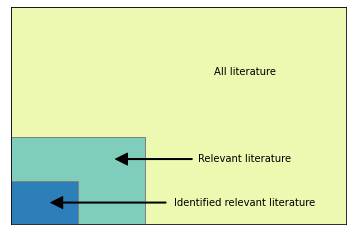

In [9]:

def lit_plot():
    fig, ax = plt.subplots()
    cols = ['#edf8b1','#7fcdbb','#2c7fb8']
    rect = Rectangle(
        (0,0),1,1, 
        facecolor=cols[0],
        edgecolor="grey"
    )
    ax.add_patch(rect)

    ax.annotate(
        "All literature",
        (0.7,0.7),
        ha="center", va="center",
        #arrowprops=dict(facecolor='black', shrink=0.05,width=1),
    )

    rect = Rectangle(
        (0,0),.4,.4, 
        facecolor=cols[1],
        edgecolor="grey"
    )
    ax.add_patch(rect)

    ax.annotate(
        "Relevant literature",
        (0.3,0.3),(0.7,0.3),
        ha="center", va="center",
        arrowprops=dict(facecolor='black', shrink=0.05,width=1),
    )

    rect = Rectangle(
        (0,0),.2,.2,
        facecolor=cols[2],
        edgecolor="grey"
    )
    ax.add_patch(rect)

    ax.annotate(
        "Identified relevant literature",
        (0.1,0.1),(0.7,0.1),
        ha="center", va="center",
        arrowprops=dict(facecolor='black', shrink=0.05,width=1),
    )

    #ax.axis('off')

    ax.set_xticks([])
    ax.set_yticks([])
    return ax

lit_plot()
plt.savefig("../plots/basic_lit_plot.png")

In [10]:
degrees = 2.5
tdf = pd.read_csv(f'../data/study_da_6 - Temperature - upper_pred_{degrees}.csv')
tdf["da_var"] = "Temperature"
pdf = pd.read_csv(f'../data/study_da_6 - Precipitation - upper_pred_{degrees}.csv')
pdf["da_var"] = "Precipitation"

dadf = pd.concat([tdf,pdf])

dadf = dadf[pd.notna(dadf["gridcells"]) & dadf["gridcells"]>0]

dadf["da_trend_p"] = dadf["da_trend_cells"] / dadf["gridcells"]

dadf["da_trend_cat"] = None

dadf.loc[dadf['da_trend_p']==0,"da_trend_cat"] = "0==DA"
dadf.loc[dadf['da_data_cells']==0,"da_trend_cat"] = "NA"
dadf.loc[dadf['da_trend_p']>0,"da_trend_cat"] = "0<DA<0.5"
dadf.loc[dadf['da_trend_p']>0.5,"da_trend_cat"] = "DA>0.5"

places =  pd.read_csv('../data/place_df.csv')

In [11]:
tdf['temperature_da'] = tdf['da_trend_cells']
pdf['precip_da'] = tdf['da_trend_cells']

dadf = tdf[['id','temperature_da']].merge(pdf[['id','precip_da']], how="outer").fillna(0)

dadf['da'] = np.max(dadf[['temperature_da','precip_da']],axis=1)
dadf = dadf[['id','da']]

dadf.head()

,id,da
0,13201,0.0
1,1544528,1.0
2,1287688,0.0
3,245321,0.0
4,1549132,0.0


In [12]:
cat_df = pd.read_csv('../data/1_predicted_category_documents.csv')
predictions = pd.read_csv('../data/1_document_relevance.csv')
df = dadf.merge(cat_df.merge(predictions), how="outer").merge(seen_df, how="outer")


pred_cats = [c for c  in df.columns if "12 - " in c and " - mean_prediction" in c]
for c in pred_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    cs = [c, c.replace('mean_prediction','lower_pred'), c.replace('mean_prediction','upper_pred')]
    df.loc[df[label]==1,cs] = 1
    print(df[c].sum())
print(pred_cats)

pred_cats = [
    "12 - Terrestrial ES - mean_prediction",
    "12 - Coastal and marine Ecosystems - mean_prediction",
    "12 - Mountains, snow and ice - mean_prediction",
    "12 - Rivers, lakes, and soil moisture - mean_prediction",
    "12 - Human and managed - mean_prediction",
    "12 - Total"
]

pcols = [
    '0 - relevance - mean_prediction',
    '0 - relevance - lower_pred',
    '0 - relevance - upper_pred'
]

df.loc[df['relevant']==1,pcols]=1

print(df.shape)

extra_cat_df = pd.read_csv('../data/1_predicted_category_documents_specific.csv')

specific_impact_cats = [x for x in extra_cat_df.columns if "18 -" in x and "mean" in x]

extra_cat_df = extra_cat_df[["id"]+[x for x in extra_cat_df.columns if "18 - " in x] ]

df = df.merge(extra_cat_df, how="outer")

print(df.shape)

import gspread
from oauth2client.service_account import ServiceAccountCredentials
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('../literature_identification/jupyter-google-e4b72bf44320.json', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '1o18FIQTmGSWJ_m1ePAzrcVhFlfesESCb2bIEG7ibJAA'
wb = gc.open_by_key(spreadsheet_key)
ws = wb.worksheet("category_label_numbers")
table = ws.get_all_values()
category_map = pd.DataFrame(table[1:], columns=table[0])

impact_columns = [x for x in df.columns if re.match("^4 - ",x)]
for x in impact_columns:
    row = category_map.loc[category_map['Specific category']==x.split(' - ')[1]]
    if row.shape[0]==0:
        continue
    for i, aggscheme in enumerate(row[['Proposed Aggregation 1', 'Proposed Aggregation 2']].values[0]):
        if aggscheme not in ['-','']:
            nc = f'{17+i} - {aggscheme}'
            if nc not in df.columns:
                df[nc] = 0
            df.loc[df[x]==1,nc] = 1


specific_impact_cats = [x for x in df.columns if "18 -" in x and "mean" in x]

for c in specific_impact_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    cs = [c, c.replace('mean_prediction','lower_pred'), c.replace('mean_prediction','upper_pred')]
    df.loc[df[label]==1,cs] = 1
    print(df[c].sum())
print(pred_cats)

specific_impact_cats

12291.100000000002
12465.100000000002
10176.9
10458.9
4585.8
4744.8
11683.5
11976.5
29838.4
30281.4
['12 - Coastal and marine Ecosystems - mean_prediction', '12 - Human and managed - mean_prediction', '12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Terrestrial ES - mean_prediction']
(98433, 301)
(98433, 353)
10538.201544435698
10830.201544435698
6161.27561033167
6285.27561033167
4449.202981217826
4595.202981217826
8148.676771121586
8286.676771121585
3198.528403142359
3304.528403142359
27911.013443616543
28461.013443616543
1312.8898182095102
1372.8898182095102
3619.8904524959544
3728.640806657588
4381.229378106844
4631.229378106844
1201.1702965553882
1263.2934744074512
['12 - Terrestrial ES - mean_prediction', '12 - Coastal and marine Ecosystems - mean_prediction', '12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Human and managed - mean_prediction', '12 -

['18 - Terrestrial Water Cycle - mean_prediction',
 '18 - Drought & Floods - mean_prediction',
 '18 - Cryosphere - mean_prediction',
 '18 - Coastal and marine Ecosystems - mean_prediction',
 '18 - Food/Agriculture - mean_prediction',
 '18 - Terrestrial ES - mean_prediction',
 '18 - Wildfires - mean_prediction',
 '18 - Livelihoods and wellbeing - mean_prediction',
 '18 - Health - mean_prediction',
 '18 - Displacement and migration - mean_prediction']

In [13]:
c = '18 - Displacement and migration - mean_prediction'
df[df[c]>0.5]

,id,da,Unnamed: 0,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,...,17 - Ecosystem productivity and carbon cycle (CMES),17 - Distribution and range shifts (TES),17 - Phenology (TES),"17 - Physiology, metabolism, mortality and growth (TES)",17 - Community composition and interaction (TES),17 - Ecosystem productivity and carbon cycle (TES),17 - Wildfires,17 - Livelihoods and wellbeing,17 - Health,17 - Displacement and migration
56,119413,1.0,36225.0,The impact of projected regional climate chang...,Ensemble-based analysis of regional climate ch...,NaN,"['Agriculture, Multidisciplinary']",NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
151,515225,17.0,49733.0,Adult sockeye salmon Oncorhynchus nerka destin...,Dead fish swimming: a review of research on th...,climate warming; harvest management; high temp...,['Fisheries; Marine & Freshwater Biology'],NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
187,1455395,1.0,16763.0,Temperature and precipitation are known to hav...,Effect of Weather Conditions on Dynamics of th...,Black-headed gull; NAO index; onset of migration,['Zoology'],NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
730,746938,0.0,13967.0,Phenological changes in key seasonally express...,Quantifying full phenological event distributi...,Fair Isle; life-history events; long-distance ...,['Biodiversity Conservation; Ecology; Environm...,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1335,813270,0.0,65789.0,The relationship between stability and change ...,Staying in place during times of change in Arc...,Climate change; Resilience; Environmental secu...,['Environmental Sciences; Environmental Studies'],NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97704,2318568,NaN,95996.0,The anadromous life cycle of Atlantic salmon S...,A critical life stage of the Atlantic salmon S...,estuary; human impact; mortality; movement; or...,['Fisheries; Marine & Freshwater Biology'],NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
97725,2097353,NaN,96027.0,Global climate change and its influence on hum...,Facing Climate Change: What Drives Internal Mi...,climate change; migration decisions; drivers; ...,['Green & Sustainable Science & Technology; En...,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
97890,1489118,NaN,96289.0,The annual migration cycle of waterbirds often...,Great flexibility in autumn movement patterns ...,NaN,['Ornithology'],NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
98059,1873887,NaN,96577.0,The paper deals with concept of environmentall...,CLIMATE EXTREMES IMPACTS AND MIGRATION AS ADAP...,climate extremes; migration; adaptation; India...,['Economics; International Relations'],NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df[c]

0        0.008486
1        0.004295
2        0.012878
3        0.006408
4        0.002537
           ...   
98428    0.159869
98429    0.003356
98430    0.373214
98431         NaN
98432         NaN
Name: 18 - Displacement and migration - mean_prediction, Length: 98433, dtype: float64

[Text(0, 0, 'Terrestrial Water Cycle'),
 Text(0, 0, 'Drought & Floods'),
 Text(0, 0, 'Cryosphere'),
 Text(0, 0, 'Coastal and marine Ecosystems'),
 Text(0, 0, 'Food/Agriculture'),
 Text(0, 0, 'Terrestrial ES'),
 Text(0, 0, 'Wildfires'),
 Text(0, 0, 'Livelihoods and wellbeing'),
 Text(0, 0, 'Health'),
 Text(0, 0, 'Displacement and migration')]

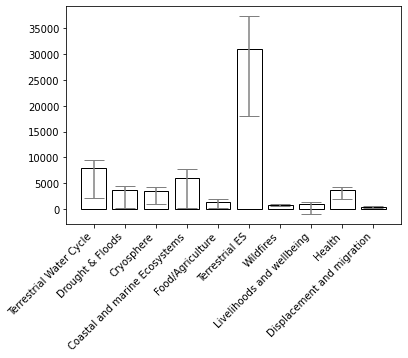

In [15]:
fig, ax = plt.subplots()
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']

xticks = []
for i, c in enumerate(specific_impact_cats):
    mid = df[
        (df['0 - relevance - mean_prediction']>0.5) & 
        (df[c]>0.5)
    ].shape[0]
    ub = df[
        (df['0 - relevance - upper_pred']>0.5) & 
        (df[c.replace('mean_prediction','upper_pred')]>0.5)
    ].shape[0]
    lb = df[
        (df['0 - relevance - lower_pred']>0.5) & 
        (df[c.replace('mean_prediction','lower_pred')]>0.5)
    ].shape[0]
    ax.bar(i, mid,color="None", edgecolor="black")
    
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=10)
    
    xticks.append(c.split("-")[1].strip())
    
    
ax.set_xticks(range(i+1))

ax.set_xticklabels(xticks, rotation=45,ha="right")
    

In [16]:
df[df[specific_impact_cats].sum(axis=1)>0].shape

(96420, 379)

In [17]:
df[df[[x.replace('mean_prediction','upper_pred') for x in specific_impact_cats]].sum(axis=1)>0].shape

(96420, 379)

In [18]:
specific_impact_cats

['18 - Terrestrial Water Cycle - mean_prediction',
 '18 - Drought & Floods - mean_prediction',
 '18 - Cryosphere - mean_prediction',
 '18 - Coastal and marine Ecosystems - mean_prediction',
 '18 - Food/Agriculture - mean_prediction',
 '18 - Terrestrial ES - mean_prediction',
 '18 - Wildfires - mean_prediction',
 '18 - Livelihoods and wellbeing - mean_prediction',
 '18 - Health - mean_prediction',
 '18 - Displacement and migration - mean_prediction']

In [19]:
specific_impacts = [
    '18 - Terrestrial Water Cycle - mean_prediction',
    '18 - Drought & Floods - mean_prediction',
    '18 - Cryosphere - mean_prediction',
    '18 - Coastal and marine Ecosystems - mean_prediction',
    '18 - Terrestrial ES - mean_prediction',
    #'18 - Carbon Cycle - mean_prediction',
    '18 - Wildfires - mean_prediction',
    '18 - Food/Agriculture - mean_prediction',
    '18 - Livelihoods and wellbeing - mean_prediction',
    '18 - Health - mean_prediction',
    '18 - Displacement and migration - mean_prediction',
    #'18 - Other anthropogenic - mean_prediction'
]

colors = [
    '#7fc97f',
    '#7fc97f',
    '#beaed4',
    '#fdc086',
    '#ffff99',
    '#ffff99',
    '#386cb0',
    '#386cb0',
    '#386cb0',
    '#386cb0'
]

labels = [x.split(" - ")[1] for x in specific_impacts]



counts = []
for i,c in enumerate(specific_impacts):
    ub = df[
        (df['0 - relevance - upper_pred']>=0.0) & 
        (df[c.replace('mean_prediction','upper_pred')]>=0.5)
    ].shape[0]    
    counts.append(ub)
    labels[i] = labels[i] + f"\n{ub:,}"
counts

[14218, 7364, 6095, 12073, 45136, 1055, 2754, 3273, 5569, 954]

(0.0, 100.0, 0.0, 100.0)

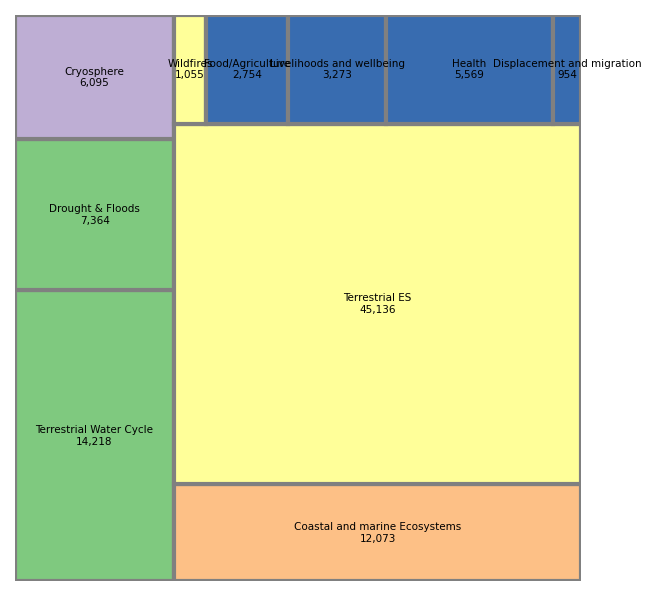

In [20]:
import squarify

fig = plt.figure(figsize=(7,5), dpi=150)

ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(counts, edgecolor="grey", linewidth=2, label=labels, color=colors, text_kwargs={"fontsize":5})

ax.axis('off')

In [21]:
norm_x = 100
norm_y = 100
normed = squarify.normalize_sizes(counts, norm_x, norm_y)
rects = squarify.squarify(normed,0,0,norm_x,norm_y)
list(rects)

[{'dx': 28.10104476551157, 'dy': 51.3711746215269, 'x': 0, 'y': 0},
 {'dx': 28.10104476551157,
  'dy': 26.606929941828955,
  'x': 0,
  'y': 51.3711746215269},
 {'dx': 28.10104476551157,
  'dy': 22.021895436644147,
  'x': 0,
  'y': 77.97810456335586},
 {'dx': 71.89895523448843,
  'dy': 17.048888637839976,
  'x': 28.10104476551157,
  'y': 0},
 {'dx': 71.89895523448843,
  'dy': 63.73880871014206,
  'x': 28.10104476551157,
  'y': 17.048888637839976},
 {'dx': 5.575405936963271,
  'dy': 19.21230265201796,
  'x': 28.10104476551157,
  'y': 80.78769734798203},
 {'dx': 14.554187630707913,
  'dy': 19.21230265201796,
  'x': 33.67645070247484,
  'y': 80.78769734798203},
 {'dx': 17.296970266996006,
  'dy': 19.21230265201796,
  'x': 48.23063833318275,
  'y': 80.78769734798203},
 {'dx': 29.430744704216544,
  'dy': 19.21230265201796,
  'x': 65.52760860017875,
  'y': 80.78769734798203},
 {'dx': 5.041646695604683,
  'dy': 19.212302652018032,
  'x': 94.9583533043953,
  'y': 80.78769734798203}]

(0.0, 100.0, 0.0, 100.0)

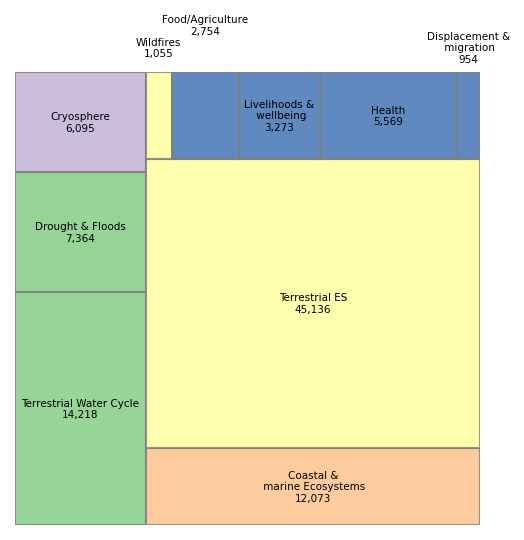

In [30]:
fig, ax = plt.subplots(figsize=(4,4),dpi=150)
offset = 0
for i, r in enumerate(rects):
    rect = Rectangle(
        (r["x"], r["y"]),r["dx"],r["dy"],
        facecolor=colors[i],
        edgecolor="grey",
        #label=f"{label} - {n:,}",
        alpha=0.8
    )
    ax.add_patch(rect)
    
    x = r["x"] + r["dx"]*0.5
    y = r["y"] + r["dy"]*0.5
    
    ly = y
    
    if r["dx"] < 15:
        ly+=15
        offset+=1
        
    if offset >0 and offset % 2 ==0 and r["dx"] < 15:
        ly+=5
    
    ax.annotate(labels[i].replace("and", "&\n"), (x, y), (x, ly), fontsize=5, ha="center", va="center")
    
ax.set_xlim(xmax=norm_x)
ax.set_ylim(ymax=norm_y)

ax.axis('off')

TypeError: normalize_sizes() missing 2 required positional arguments: 'dx' and 'dy'

In [45]:

pred_cats = [c for c  in df.columns if "12 - " in c and " - mean_prediction" in c]
for c in pred_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    cs = [c, c.replace('mean_prediction','lower_pred'), c.replace('mean_prediction','upper_pred')]
    df.loc[df[label]==1,cs] = 1
    print(df[c].sum())
print(pred_cats)

pred_cats = [
    "12 - Rivers, lakes, and soil moisture - mean_prediction",
    "12 - Mountains, snow and ice - mean_prediction",
    "12 - Coastal and marine Ecosystems - mean_prediction",
    "12 - Terrestrial ES - mean_prediction",
    "12 - Human and managed - mean_prediction",
]

colors = [
    '#7fc97f',
    '#beaed4',
    '#fdc086',
    '#ffff99',
    '#386cb0',
]

pcols = [
    '0 - relevance - mean_prediction',
    '0 - relevance - lower_pred',
    '0 - relevance - upper_pred'
]

df.loc[df['relevant']==1,pcols]=1



12465.1
12465.1
10458.900000000001
10458.900000000001
4744.8
4744.8
11976.499999999998
11976.499999999998
30281.4
30281.4
['12 - Coastal and marine Ecosystems - mean_prediction', '12 - Human and managed - mean_prediction', '12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Terrestrial ES - mean_prediction']


(0.0, 100.0, 0.0, 100.0)

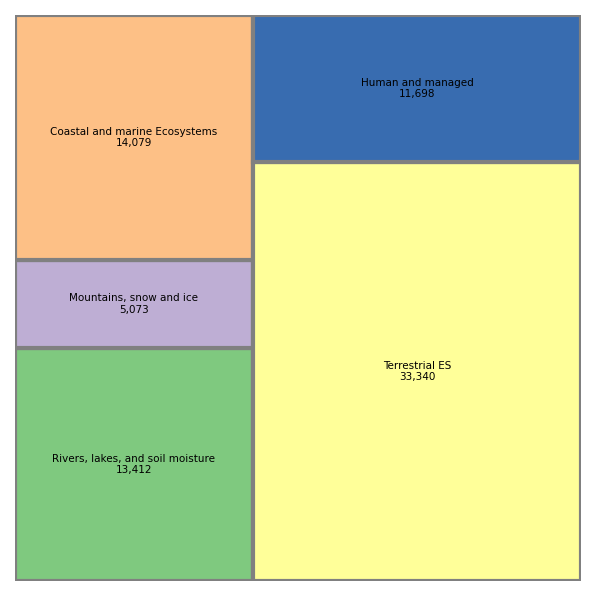

In [46]:
labels = [x.split(" - ")[1] for x in pred_cats]

counts = []
for i,c in enumerate(pred_cats):
    ub = df[
        (df['0 - relevance - upper_pred']>=0.0) & 
        (df[c.replace('mean_prediction','upper_pred')]>=0.5)
    ].shape[0]    
    counts.append(ub)
    labels[i] = labels[i] + f"\n{ub:,}"
    
fig = plt.figure(figsize=(7,5), dpi=150)





ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(counts, edgecolor="grey", linewidth=2, label=labels, color=colors, text_kwargs={"fontsize":5})

ax.axis('off')

In [95]:
df.da.unique()

array([  0.,   1.,  10.,   2.,  67.,   3.,  12.,  13., 168.,  81.,   8.,
        33., 524.,   4., 570.,  17.,   5.,  25.,  15.,   7.,   9.,   6.,
        45., 206., 268.,  11.,  nan,  27.,  19.,  14.,  80., 392.,  18.,
        34.,  24.,  61.,  54.,  30., 108.,  47., 213.,  52.,  28.,  48.])